<a href="https://colab.research.google.com/github/Howl06/practice/blob/main/keras/train_on_batch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras import datasets, layers, models, optimizers, utils
import numpy as np
import matplotlib.pyplot as plt


In [4]:
(x_train, y_train), (x_val, y_val) = datasets.mnist.load_data()
x_train = np.expand_dims(x_train, axis=-1)
x_val = np.expand_dims(x_val, axis=-1)
# one hot encoding
y_train = utils.to_categorical(y_train, 10)
y_val = utils.to_categorical(y_val, 10) 
y_val[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [5]:
inputs = layers.Input((28, 28, 1))
# simple cnn (filers, kernel size)
x = layers.Conv2D(16, 3, activation='relu')(inputs)
x = layers.Conv2D(16, 3, activation='relu')(x)
# gap
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs, x)

In [7]:
# optimizer, lossfunction
model.compile('adam', 'categorical_crossentropy')

In [8]:
# model.fit(x_train, y_train, batch_size=128,epochs=10, validation_data=(x_val, y_val)) simple fit

In [9]:
# batch size
bs = 256
epochs = 20
step_per_epochs = x_train.shape[0] // bs
idxs = np.arange(len(x_train))
epoch_loss = []
for i in range(epochs):
    batch_loss = []
    for j in range(step_per_epochs):
        # call batch idx
        idx = idxs[j * bs: (j + 1) * bs]
        x = x_train[idx]
        y = y_train[idx]
        # train return loss
        loss = model.train_on_batch(x, y,)
        batch_loss.append(loss)
    total_loss = np.mean(batch_loss)
    # save model if improved
    epoch_loss.append(total_loss)
    if total_loss <= np.min(epoch_loss):
        print('save model')
        model.save('model.h5')
    
    print(total_loss)
    np.random.shuffle(idxs)



save model
2.3598661677450194
save model
1.2286592777977643
save model
0.8999454050492017
save model
0.7291364916878887
save model
0.6280804322316096
save model
0.555274372554233
save model
0.511302116080227
save model
0.46755089082269585
save model
0.43854798300144
save model
0.41179844367707896
save model
0.3863837775002178
save model
0.37036823424009174
save model
0.3599822377292519
save model
0.3464936922248612
save model
0.33872271284588384
save model
0.32647086253278274
save model
0.3194761651321354
save model
0.31670232435576934
save model
0.3070090402267937
save model
0.2981977956926721


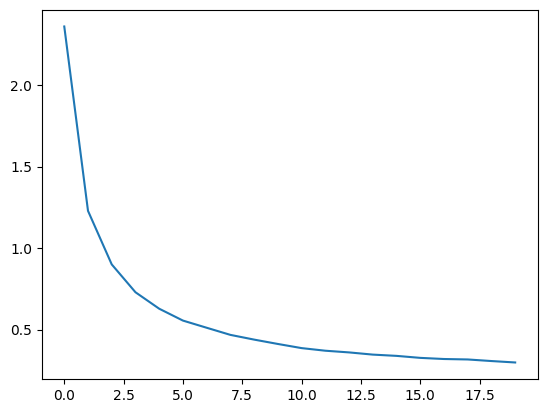

In [10]:
plt.plot(epoch_loss)